In [1]:
f = open('/home/div/Desktop/beliefbox/src/algorithms/tests/bin/ola_1experiment.txt', 'r')

f.readline()
lis = f.readlines()
f.close()

lis.pop()
lis.pop()
c=0
r = []
for line in lis:
    l = line.split()
    c+=float(l[-3])
    r.append( c )
    #c+=1
    #if c> 5:
    #    break

import matplotlib.pyplot as plt
t = range(len(r))
plt.plot(t, r)

plt.xlabel('Time (t)')
plt.ylabel('Reward (r)')
plt.title('Online Reward')
plt.grid(False)
#plt.savefig("test.png")
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

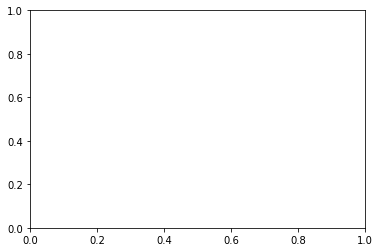

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pdb

def rewards(fname='/home/div/Desktop/beliefbox/src/algorithms/tests/bin/ola_V_UTS_10exp.txt'):
    f = open(fname, 'r')

    f.readline()
    lis = f.readlines()
    f.close()

    #print(lis[-1],lis[-2])
    lis.pop()
    lis.pop()
    #print(lis[-1])

    c=0
    total_rewards = []
    r = []
    for line in lis:
        l = line.split()
        if l[-3]=='H:2,':
            total_rewards.append(r)
            r = []
            c = 0
            if len(total_rewards)==10:
                break
            continue
        c+=float(l[-3])
        r.append( c )
    if len(total_rewards)==9:
        total_rewards.append(r)

    
    total_rewards = np.array(total_rewards)
    #pdb.set_trace()
    r_max = []
    r_min = []
    r_mean = []
    for i in range(len(total_rewards[0])):
            r_max.append(max(total_rewards[:,i])) 
            r_min.append (min(total_rewards[:,i]))
            r_mean.append(np.mean(total_rewards[:,i]))
    r_max = np.array(r_max)
    r_min = np.array(r_min)
    err = np.std(r_max - r_min)
    return r_mean,err

r_mean,err = rewards('/home/div/Desktop/beliefbox/src/algorithms/tests/bin/ola_100_exp_NONE.txt')
t = range(len(r_mean))
#plt.plot(t, r)
#plt.plot(t, r_max)
#plt.plot(t, r_min)
plt.errorbar(t, r, err)


plt.xlabel('Time (t)')
plt.ylabel('Reward (r)')
plt.title('Online Reward')
plt.grid(False)
plt.savefig("./test.png")
plt.show()

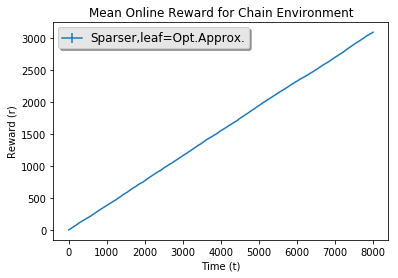

In [19]:
import pdb
def rewards1(fname='/home/div/Desktop/beliefbox/src/algorithms/tests/bin/ola.txt'):
    f = open(fname, 'r')

    f.readline()
    lis = f.readlines()
    f.close()

    #print(lis[-1],lis[-2])
    lis.pop()
    lis.pop()
    #print(lis[-1])

    c=0
    total_rewards = []
    r = []
    for line in lis:
        l = line.split()
        if l[-3]=='H:2,':
            total_rewards.append(r)
            r = []
            c = 0
            if len(total_rewards)==10:
                break
            continue
        c+=float(l[2])
        r.append( c )
    if len(total_rewards)==9:
        total_rewards.append(r)

    total_rewards = np.array(total_rewards)
    #pdb.set_trace()
    r_max = []
    r_min = []
    r_mean = []
    for i in range(len(total_rewards[0])):
            r_max.append(max(total_rewards[:,i])) 
            r_min.append (min(total_rewards[:,i]))
            r_mean.append(np.mean(total_rewards[:,i]))
    r_max = np.array(r_max)
    r_min = np.array(r_min)
    err = np.std(r_max - r_min)
    return r_mean,err

r_mean,err = rewards1('/home/div/Desktop/beliefbox/src/algorithms/tests/bin/ola.txt')

fig, ax = plt.subplots()
ax.errorbar(t, r1, yerr=0, label='Sparser,leaf=Opt.Approx.')

# Now add the legend with some customizations.
legend = ax.legend(loc='upper left', shadow=True)

# The frame is matplotlib.patches.Rectangle instance surrounding the legend.
frame = legend.get_frame()
frame.set_facecolor('0.90')

# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')

for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
    
plt.xlabel('Time (t)')
plt.ylabel('Reward (r)')
plt.title('Mean Online Reward for Chain Environment')
plt.grid(False)
plt.savefig('./chain1.eps', format='eps', dpi=1000)
plt.show()

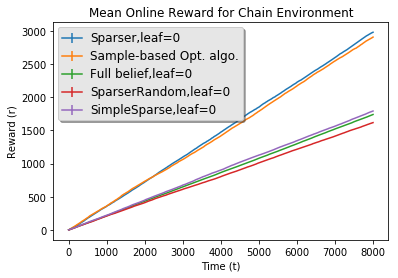

In [24]:

r1,e1 = rewards1()
t = range(len(r1))
#r2,e2 = rewards1('/home/div/Desktop/beliefbox/src/algorithms/tests/bin/ola_100_exp_NONE.txt')
r3,e3 = rewards('/home/div/Desktop/beliefbox/src/algorithms/tests/bin/ola_sampleBased.txt')
r4,e4 = rewards('/home/div/Desktop/beliefbox/src/algorithms/tests/bin/ola_fullBelief.txt')
r5,e5 = rewards('/home/div/Desktop/beliefbox/src/algorithms/tests/bin/ola_sparserRandomNone.txt')
r6,e6 = rewards('/home/div/Desktop/beliefbox/src/algorithms/tests/bin/ola_WangSparse.txt')

# Create plots with pre-defined labels.
# Alternatively, you can pass labels explicitly when calling `legend`.
fig, ax = plt.subplots()
ax.errorbar(t, r1, yerr=0, label='Sparser,leaf=0')
#ax.errorbar(t, r2, yerr=0, label='Sparser,leaf=0')
ax.errorbar(t, r3, yerr=0, label='Sample-based Opt. algo.')
ax.errorbar(t, r4, yerr=0, label='Full belief,leaf=0')
ax.errorbar(t, r5, yerr=0, label='SparserRandom,leaf=0')
ax.errorbar(t, r6, yerr=0, label='SimpleSparse,leaf=0')

# Now add the legend with some customizations.
legend = ax.legend(loc='upper left', shadow=True)

# The frame is matplotlib.patches.Rectangle instance surrounding the legend.
frame = legend.get_frame()
frame.set_facecolor('0.90')

# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')

for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
    
plt.xlabel('Time (t)')
plt.ylabel('Reward (r)')
plt.title('Mean Online Reward for Chain Environment')
plt.grid(False)
plt.savefig('./chain1.eps', format='eps', dpi=1000)
plt.show()

In [181]:

def rewards1(fname='/home/div/Desktop/beliefbox/src/algorithms/tests/bin/ola_context_bandit.txt',n1=0,n2=1000):
    f = open(fname, 'r')

    f.readline()
    lis = f.readlines()
    f.close()

    #print(lis[-1],lis[-2])
    lis.pop()
    lis.pop()
    #print(lis[-1])

    c=0
    total_rewards = []
    r = []
    for line in lis:
        l = line.split()
        if l[-3]=='H:2,':
            total_rewards.append(r)
            r = []
            c = 0
            if len(total_rewards)==10:
                break
            continue
        c+=float(l[-3])
        r.append( c )
    if len(total_rewards)==9:
        total_rewards.append(r)

    
    total_rewards = np.array(total_rewards)
    print(total_rewards.shape)
    #pdb.set_trace()
    r_max = []
    r_min = []
    r_mean = []
    for i in range(n1,n2):
            r_max.append(max(total_rewards[:,i])) 
            r_min.append (min(total_rewards[:,i]))
            r_mean.append(np.mean(total_rewards[:,i]))
    r_max = np.array(r_max)
    r_min = np.array(r_min)
    err = np.std(r_max - r_min)
    return r_mean[-1],np.std(r_max-r_min)

r,std = rewards1(fname='/home/div/Desktop/beliefbox/src/algorithms/tests/bin/ola.txt',n1=7000,n2=8000)
print(r,r1)

(10, 8000)
2248.9 12.012652954281165


In [177]:
f = open('/home/div/Desktop/beliefbox/src/algorithms/tests/bin/ola_double_loop_10k.txt', 'r')

f.readline()
lis = f.readlines()
f.close()

lis.pop()
lis.pop()
c=0
r = []
for line in lis:
    l = line.split()
    c+=float(l[-3])
    r.append( c )
print(r[1000],r[2000],r[8000])

216.0 420.0 1645.0
